Этот ноутбук будет просчитываться на каггле и использовать каггл пути к данным.

## Load model

In [3]:
from ultralytics import YOLO

model = YOLO("yolo11l.pt")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


## Check data

In [4]:
images = "/kaggle/input/architecture-custom/clean"
data = "/kaggle/input/architecture-custom/clean/data.yaml"

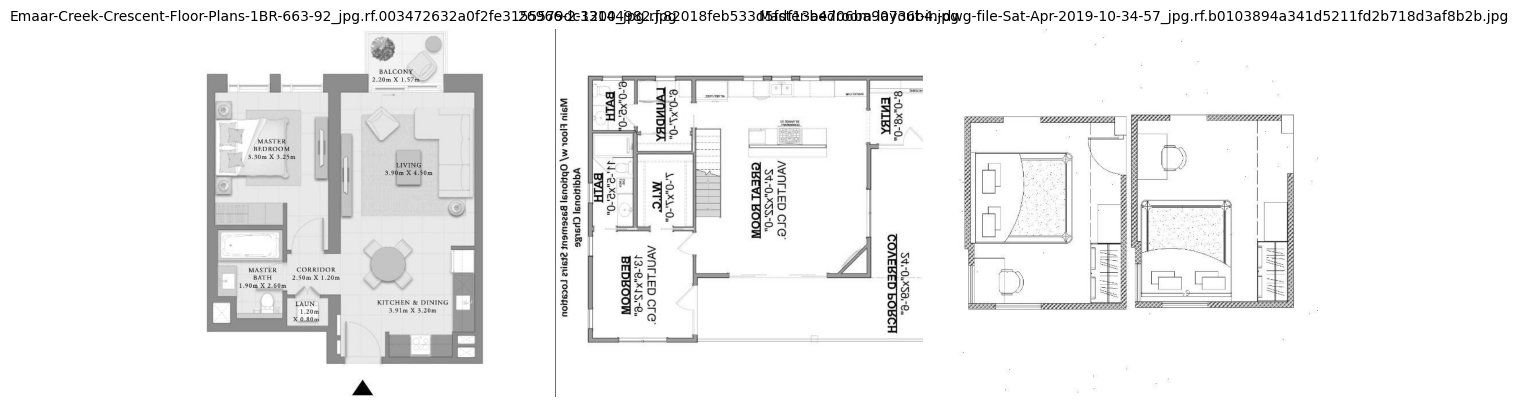

In [5]:
import random
from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt

paths = list(Path(images).rglob("*.jpg"))
pick = random.sample(paths, k=min(3, len(paths)))

plt.figure(figsize=(12, 4))
for i, p in enumerate(pick, 1):
    img = Image.open(p).convert("RGB")
    ax = plt.subplot(1, 3, i)
    ax.imshow(img)
    ax.set_title(p.name, fontsize=10)
    ax.axis("off")
plt.tight_layout()
plt.show()

## Finetune model

In [6]:
import torch

device = 0 if torch.cuda.is_available() else "cpu"
device

0

### Finetune neck and head

In [8]:
model.train(
    data=data,
    imgsz=640,
    epochs=30,
    freeze=10,
    lr0=0.003,
    batch=16,
    optimizer="AdamW",
    close_mosaic=10,
    device=device,
    workers=4,
    project="/kaggle/working/runs",
    name="yolo11l_stageA",
);

Ultralytics 8.3.249 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/input/architecture-custom/clean/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=10, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.003, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11l.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolo11l_stageA, nbs=64, nms=False, opset=None, optimize=False, optimizer=AdamW, overlap_mask=True, patience=100, perspect

### Continue to finetune full model

In [9]:
model = YOLO("/kaggle/working/runs/yolo11l_stageA/weights/best.pt")

model.train(
    data=data,
    imgsz=640,
    epochs=120,
    freeze=0,
    lr0=0.001,
    batch=16,
    optimizer="AdamW",
    close_mosaic=0,
    device=device,
    workers=4,
    project="/kaggle/working/runs",
    name="yolo11l_stageB",
);

Ultralytics 8.3.249 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=0, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/input/architecture-custom/clean/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=120, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=0, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=/kaggle/working/runs/yolo11l_stageA/weights/best.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolo11l_stageB, nbs=64, nms=False, opset=None, optimize=False, optimizer=AdamW, o

In [11]:
!zip -r yolo11l_custom_train.zip /kaggle/working/runs/yolo11l_stageB

  adding: kaggle/working/runs/yolo11l_stageB/ (stored 0%)
  adding: kaggle/working/runs/yolo11l_stageB/train_batch2.jpg (deflated 7%)
  adding: kaggle/working/runs/yolo11l_stageB/train_batch0.jpg (deflated 8%)
  adding: kaggle/working/runs/yolo11l_stageB/val_batch0_pred.jpg (deflated 13%)
  adding: kaggle/working/runs/yolo11l_stageB/weights/ (stored 0%)
  adding: kaggle/working/runs/yolo11l_stageB/weights/last.pt (deflated 8%)
  adding: kaggle/working/runs/yolo11l_stageB/weights/best.pt (deflated 8%)
  adding: kaggle/working/runs/yolo11l_stageB/val_batch0_labels.jpg (deflated 16%)
  adding: kaggle/working/runs/yolo11l_stageB/BoxPR_curve.png (deflated 9%)
  adding: kaggle/working/runs/yolo11l_stageB/val_batch1_labels.jpg (deflated 15%)
  adding: kaggle/working/runs/yolo11l_stageB/val_batch1_pred.jpg (deflated 12%)
  adding: kaggle/working/runs/yolo11l_stageB/val_batch2_pred.jpg (deflated 16%)
  adding: kaggle/working/runs/yolo11l_stageB/BoxR_curve.png (deflated 6%)
  adding: kaggle/work